In [1]:
import sympy as sp
from numpy.linalg import inv
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X =[-3.0,-2.0,-1.0,0.0,1.0,2.0]
Y =[0.04979,0.13534,0.36788,1.0,2.7183,7.3891] 

In [9]:
#Первой степени
n =1 
N =5
sum=[0,0,0,0,0,0,0]
for i in range(N):
    sum[0]+= X[i]
    sum[1]+= Y[i]
    sum[2]+= X[i]**2
    sum[3]+= Y[i]*X[i]
    sum[4]+= Y[i]*X[i]**2
    sum[5]+= X[i]**3
    sum[6]+= X[i]**4
a01=((N+1)*sum[3]-sum[1]*sum[0])/((N+1)*sum[2]-sum[0]*sum[0])
a00=(sum[1]-a01*sum[0])/(N+1)
a01,a00

(0.5067503076923077, 1.134176923076923)

In [10]:
x=sp.Symbol('x')
F1 = a00 + a01*x
print("F1(x) = ",F1)
F = 0
O1 =np.zeros(6)
for j in range(N+1):
    print("F1({0}) = {1} ".format(X[j],a00+a01*X[j]))
    F+=(a00+a01*X[j]-Y[j])**2
    O1[j] = a00+a01*X[j]
print("Ф =",F)

F1(x) =  0.506750307692308*x + 1.13417692307692
F1(-3.0) = -0.38607400000000003 
F1(-2.0) = 0.12067630769230764 
F1(-1.0) = 0.6274266153846153 
F1(0.0) = 1.134176923076923 
F1(1.0) = 1.6409272307692306 
F1(2.0) = 2.1476775384615383 
Ф = 28.908801846811976


In [11]:
a1= [0,0,0]
Y1 = [sum[1],sum[3],sum[4]]
A = [[N+1,sum[0],sum[2]],[sum[0],sum[2],sum[5]],[sum[2],sum[5],sum[6]]]
a = np.matmul(inv(A),Y1)
F2 = a[0] + a[1]*x+a[2]*x**2
print("F2(x) = ",F2)
F = 0
O2 =np.zeros(6)
for j in range(N+1):
    print("F2({0}) = {1} ".format(X[j],a[0] + a[1]*X[j]+a[2]*X[j]**2))
    F+=(a[0] + a[1]*X[j]+a[2]*X[j]**2-Y[j])**2
    O2[j] = a[0] + a[1]*X[j]+a[2]*X[j]**2
print("Ф =",F)

F2(x) =  0.3249496875*x**2 + 1.1816458125*x + 0.884215625
F2(-3.0) = 0.2638253749999997 
F2(-2.0) = -0.17927724999999972 
F2(-1.0) = 0.027519500000000308 
F2(0.0) = 0.8842156250000002 
F2(1.0) = 2.3908111249999995 
F2(2.0) = 4.547306 
Ф = 8.45708854888811


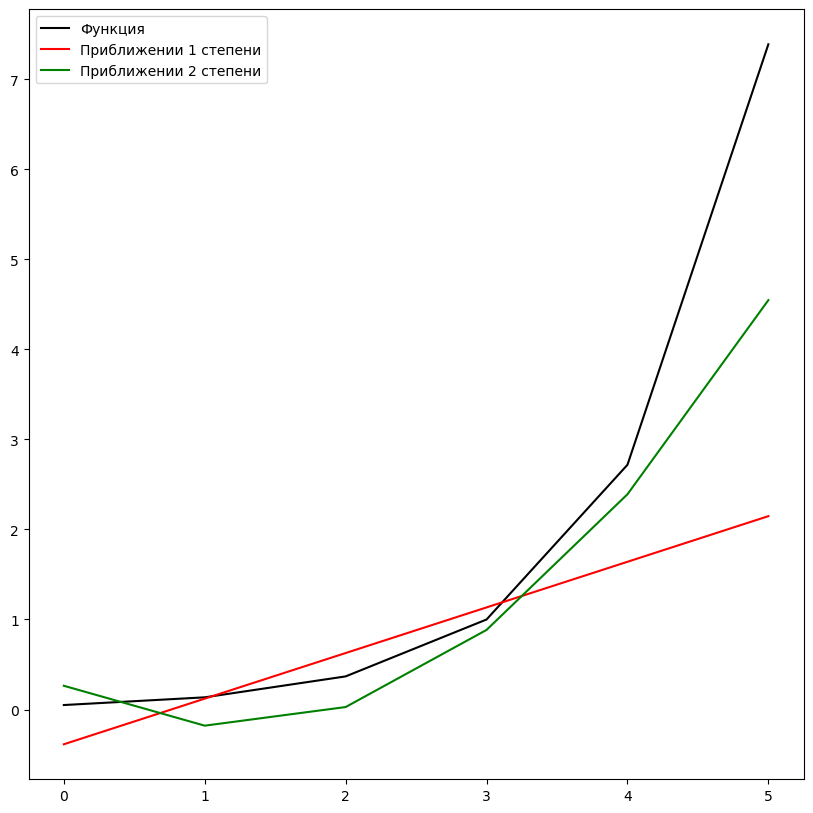

In [12]:
plt.figure(figsize = (10,10))
plt.plot(Y, color = 'black',label = 'Функция')
plt.plot(O1, color = 'red',label = 'Приближении 1 степени')
plt.plot(O2, color = 'green',label = 'Приближении 2 степени')
plt.legend()

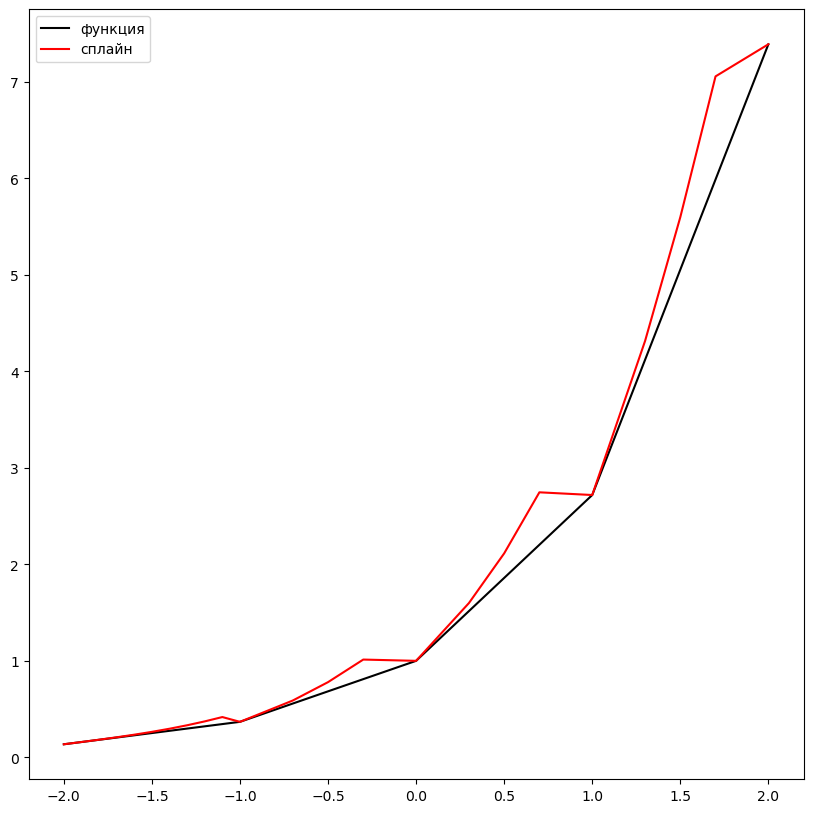

In [6]:
#сплайн
SY = [0.13534,0.36788,1,2.7183,7.3891]
SF = [0.13534,0.158694,0.182647,0.207799,0.234749,0.264097,0.296441,0.332382,0.372518,0.417449,0.36788,0.588892,0.779251,1.01316,1,1.59885,2.11358,2.74632,2.7183,4.3148,5.59747,7.05636,7.3891]
plt.figure(figsize = (10,10))
plt.plot([-2,-1,0,1,2],SY, color = 'black',label = 'функция')
plt.plot([ -2,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1,-0.7,-0.5,-0.3,0,0.3,0.5,0.7,1,1.3,1.5,1.7,2],SF, color = 'red',label = 'сплайн')
plt.legend()

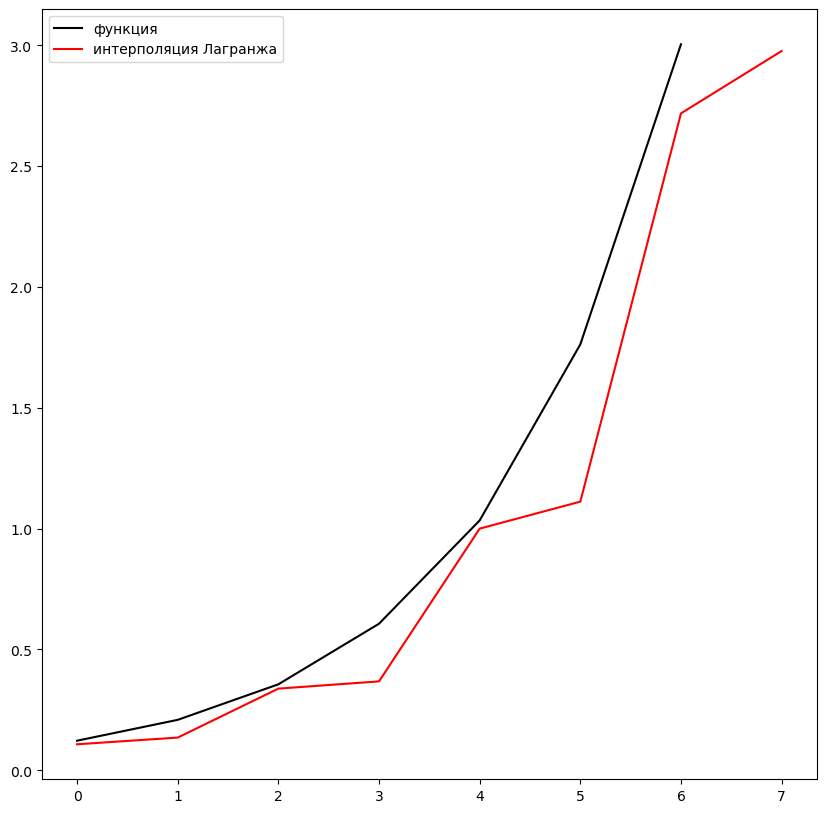

In [3]:
#Лагранж
LF = [0.107624,0.135335,0.337973,0.367879,1,1.11162,2.71828,2.97628]
#LY = [0.122456,0.135335,0.332871,0.367879,1,1.10517,2.71828,3.00417]
xx = np.linspace(-2.1, 1.1, 7)
exx = np.exp(xx)
plt.figure(figsize = (10,10))
plt.plot(exx, color = 'black', label = 'функция')
plt.plot(LF, color = 'red', label = 'интерполяция Лагранжа')
plt.legend()

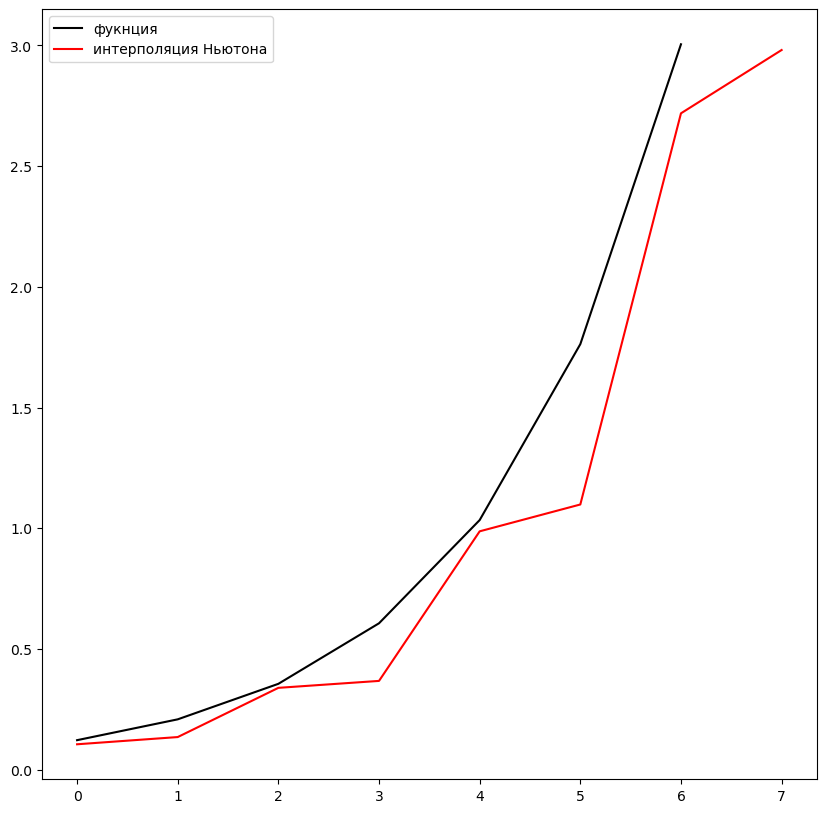

In [5]:
#Ньютон
#NY = [0.122456,0.135335,0.332871,0.367879,1,1.10517,2.71828,3.00417]
NF = [0.105462,0.135335,0.339171,0.367879,0.98732,1.09844,2.71828,2.98041]
plt.figure(figsize = (10,10))
plt.plot(exx, color = 'black',label = 'фукнция')
plt.plot(NF, color = 'red',label = 'интерполяция Ньютона')
plt.legend()